In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tqts.quantizer.paa import PAA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_DIR = "../data/"
IMG_DIR = "../images/"

### Non-Stationary

In [4]:
etth2 = pd.read_csv(DATA_DIR + 'electricity/electricity.csv', index_col=0)

In [5]:
etth2.head()

,0,1,2,3,4,5,6,7,8,9,...,311,312,313,314,315,316,317,318,319,OT
date,,,,,,,,,,,,,,,,,,,,,
2016-07-01 02:00:00,14.0,69.0,234.0,415.0,215.0,1056.0,29.0,840.0,226.0,265.0,...,676.0,372.0,80100.0,4719.0,5002.0,48.0,38.0,1558.0,182.0,2162.0
2016-07-01 03:00:00,18.0,92.0,312.0,556.0,292.0,1363.0,29.0,1102.0,271.0,340.0,...,805.0,452.0,95200.0,4643.0,6617.0,65.0,47.0,2177.0,253.0,2835.0
2016-07-01 04:00:00,21.0,96.0,312.0,560.0,272.0,1240.0,29.0,1025.0,270.0,300.0,...,817.0,430.0,96600.0,4285.0,6571.0,64.0,43.0,2193.0,218.0,2764.0
2016-07-01 05:00:00,20.0,92.0,312.0,443.0,213.0,845.0,24.0,833.0,179.0,211.0,...,801.0,291.0,94500.0,4222.0,6365.0,65.0,39.0,1315.0,195.0,2735.0
2016-07-01 06:00:00,22.0,91.0,312.0,346.0,190.0,647.0,16.0,733.0,186.0,179.0,...,807.0,279.0,91300.0,4116.0,6298.0,75.0,40.0,1378.0,191.0,2721.0


In [6]:
etth2.shape

(26304, 321)

<Axes: xlabel='date'>

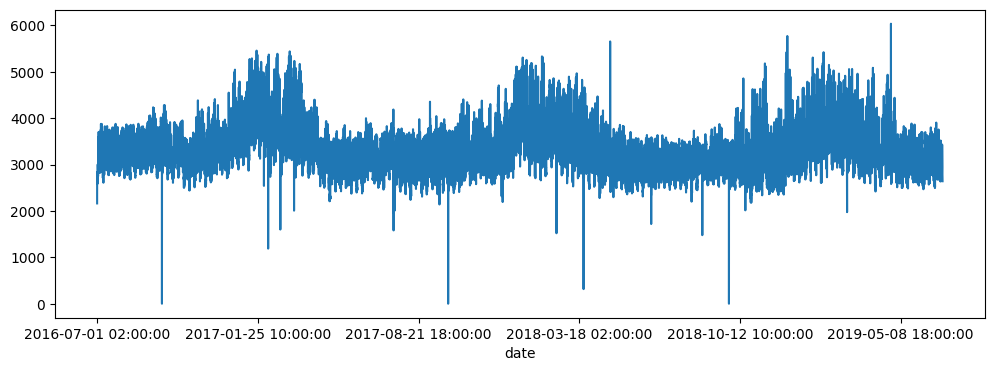

In [7]:
plt.figure(figsize=(12,4))
etth2['OT'].plot()

In [8]:
scaler = MinMaxScaler()
timeseries = etth2['OT']
scaled_etth2 = scaler.fit_transform(timeseries.values.reshape(-1, 1))

<Axes: xlabel='date'>

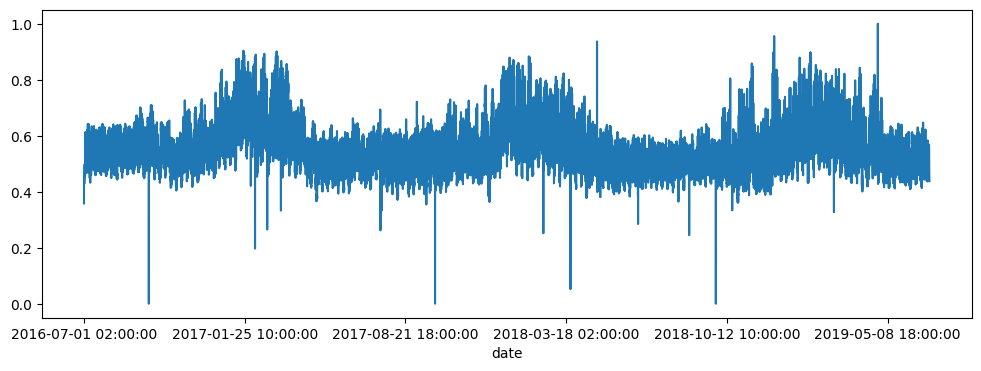

In [9]:
scaled_etth2 = pd.Series(scaled_etth2.flatten(), index=timeseries.index)
plt.figure(figsize=(12,4))
scaled_etth2.plot()

In [10]:
from tqts.quantizer.kernel_sax import KernelSAX

Epoch 1, Boundaries delta: 0.5017851564, Codewords delta: 0.2007293358
Epoch 2, Boundaries delta: 0.0773473484, Codewords delta: 0.0432208653
Epoch 3, Boundaries delta: 0.0424749135, Codewords delta: 0.0272744277
Epoch 4, Boundaries delta: 0.0265040954, Codewords delta: 0.0195715710
Epoch 5, Boundaries delta: 0.0181877508, Codewords delta: 0.0151233351
Epoch 6, Boundaries delta: 0.0134188992, Codewords delta: 0.0119055921
Epoch 7, Boundaries delta: 0.0102393561, Codewords delta: 0.0094696495
Epoch 8, Boundaries delta: 0.0082123683, Codewords delta: 0.0075946704
Epoch 9, Boundaries delta: 0.0067652323, Codewords delta: 0.0062350790
Epoch 10, Boundaries delta: 0.0056866253, Codewords delta: 0.0054611641
Epoch 11, Boundaries delta: 0.0049960484, Codewords delta: 0.0048351900
Epoch 12, Boundaries delta: 0.0045100808, Codewords delta: 0.0043259999
Epoch 13, Boundaries delta: 0.0041051707, Codewords delta: 0.0039063359
Epoch 14, Boundaries delta: 0.0037623338, Codewords delta: 0.0035557834
E

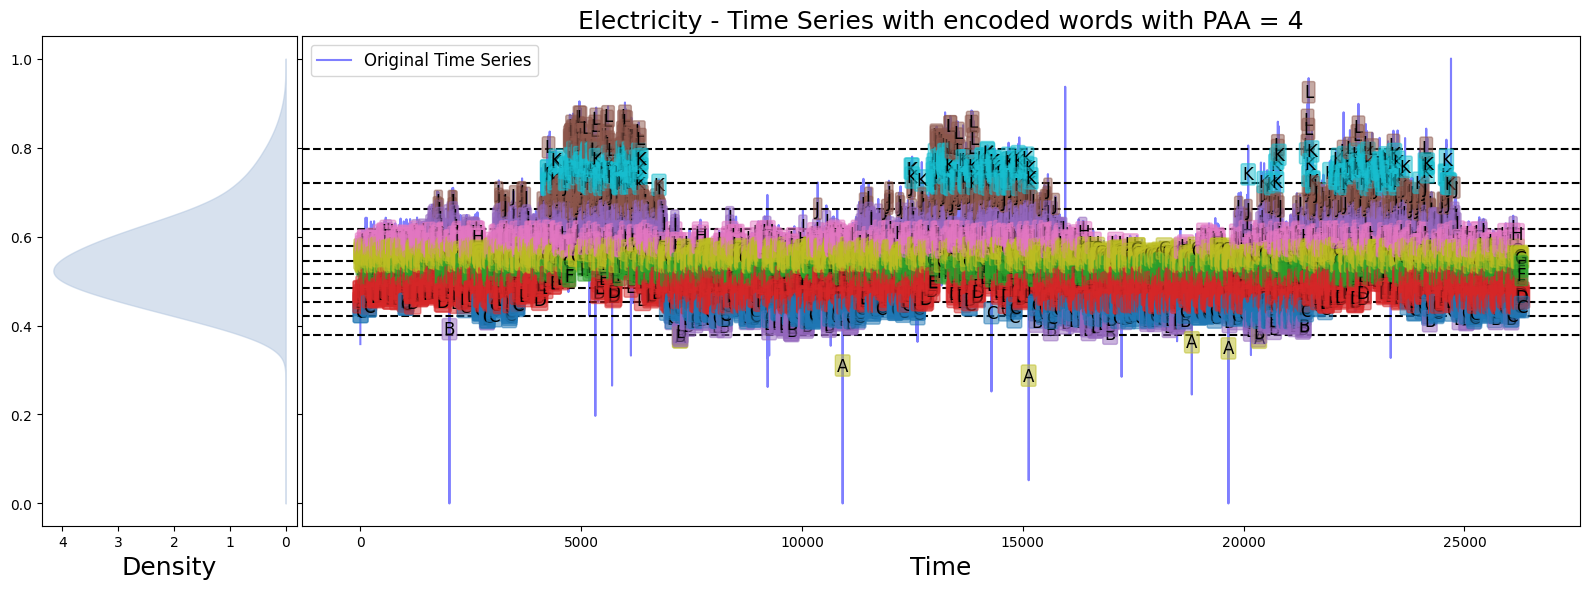

In [17]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=4)
kernel_sax.fit(scaled_etth2.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="electricity/electricity_ksax.png", data_name='Electricity')
kernel_sax.text_to_df(start_datetime=str(etth2.index[0]), csv_path=DATA_DIR+"electricity/electricity_ksax.csv")

### Stationary

In [11]:
target = scaled_etth2
target = target.diff().dropna()

In [12]:
target.head()

date
2016-07-01 03:00:00    0.111516
2016-07-01 04:00:00   -0.011765
2016-07-01 05:00:00   -0.004805
2016-07-01 06:00:00   -0.002320
2016-07-01 07:00:00    0.003480
dtype: float64

Epoch 1, Boundaries delta: 0.2272776569, Codewords delta: 0.2434205690
Epoch 2, Boundaries delta: 0.0968768846, Codewords delta: 0.0459615430
Epoch 3, Boundaries delta: 0.0475849804, Codewords delta: 0.0302535560
Epoch 4, Boundaries delta: 0.0302849172, Codewords delta: 0.0186428412
Epoch 5, Boundaries delta: 0.0187414335, Codewords delta: 0.0117479666
Epoch 6, Boundaries delta: 0.0117674605, Codewords delta: 0.0085149877
Epoch 7, Boundaries delta: 0.0080750094, Codewords delta: 0.0066028822
Epoch 8, Boundaries delta: 0.0059750825, Codewords delta: 0.0052141508
Epoch 9, Boundaries delta: 0.0047158787, Codewords delta: 0.0041789743
Epoch 10, Boundaries delta: 0.0037893221, Codewords delta: 0.0034065462
Epoch 11, Boundaries delta: 0.0031104286, Codewords delta: 0.0029059993
Epoch 12, Boundaries delta: 0.0026705849, Codewords delta: 0.0025666955
Epoch 13, Boundaries delta: 0.0023648910, Codewords delta: 0.0023028468
Epoch 14, Boundaries delta: 0.0021420398, Codewords delta: 0.0020842813
E

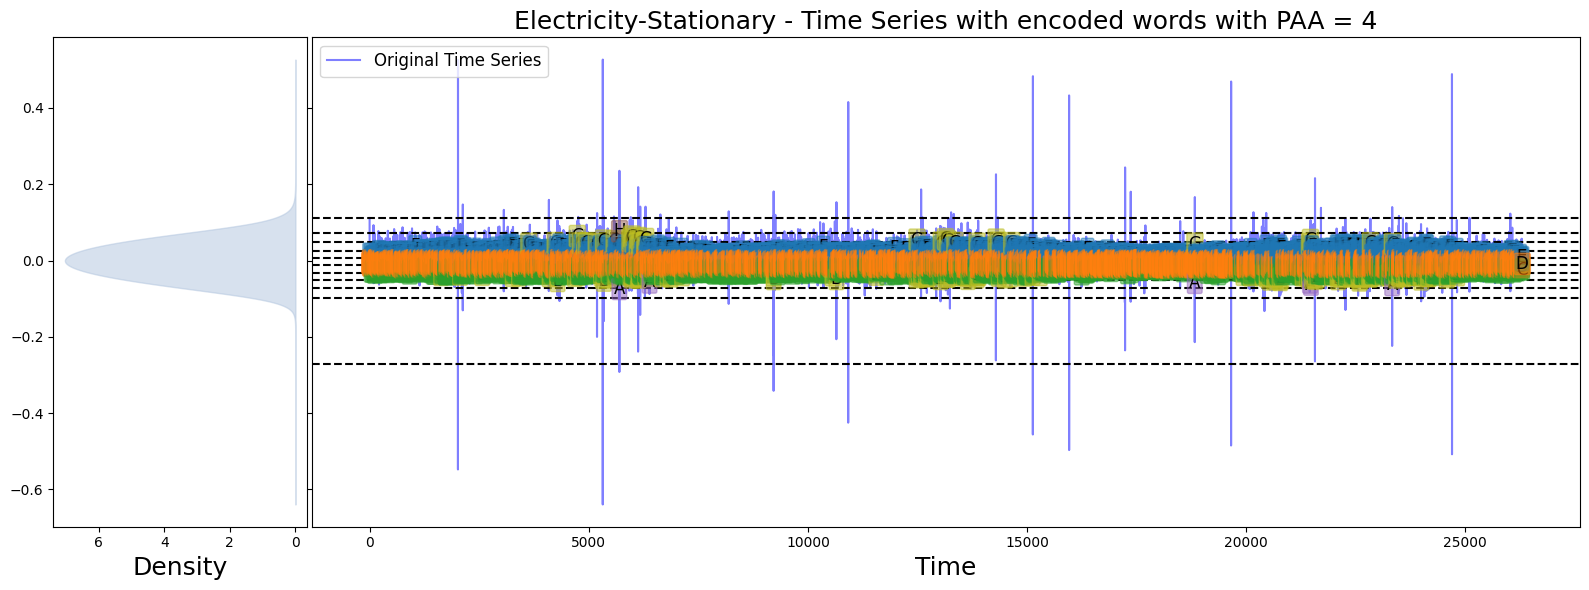

In [13]:
kernel_sax = KernelSAX(kernel='epanechnikov', n_alphabet=12, bandwidth=0.1, epochs=70, paa_window_size=4)
kernel_sax.fit(target.values, verbose=True)
kernel_sax.plot_with_boundaries(path=IMG_DIR, filename="electricity/electricity_stationary_ksax.png", data_name='Electricity-Stationary')
kernel_sax.text_to_df(start_datetime=str(etth2.index[0]), csv_path=DATA_DIR+"electricity/electricity_stationary_ksax.csv")